## We are using Airbnb Amsterdam data to understand the pricing of airbnb and reviews and understand how these variables are connected.
In this note book you can see, 
1.Libraries import
2. Cleaning and exploration of listings and review data and merging them.
3. Creating new columns for further analysis.
4. Geographical visualization
5. Regression model to see correlation
6. Clustering

## Importing libraries

In [241]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import folium
import json

In [242]:
%matplotlib inline

In [243]:
path=r'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data'

## Listing data

In [244]:
#Importing llisting data
df_list=pd.read_csv(os.path.join(path,'Original Data','listings_details.csv'),index_col=False)

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/4009410837.py:2: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list=pd.read_csv(os.path.join(path,'Original Data','listings_details.csv'),index_col=False)


In [245]:
df_list.shape

(20030, 96)

In [246]:
df_list.head()

id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20181206172549   2018-12-06   
1   3209   https://www.airbnb.com/rooms/3209  20181206172549   2018-12-06   
2  20168  https://www.airbnb.com/rooms/20168  20181206172549   2018-12-06   
3  25428  https://www.airbnb.com/rooms/25428  20181206172549   2018-12-06   
4  27886  https://www.airbnb.com/rooms/27886  20181206172549   2018-12-06   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1                  Quiet apt near center, great view   
2         100%Centre-Studio 1 Private Floor/Bathroom   
3                Lovely apt in City Centre (Jordaan)   
4  Romantic, stylish B&B houseboat in canal district   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  You will love our spacious (90 m2) bright apar...   
2  Cozy studio on your own private floor, 100% in...   
3                                                NaN   
4  Stylish and romantic houseboat on fantastic hi...   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  Our apartment has lots of light, a balcony and...   
2  For those who like all facets of city life. In...   
3  This nicely furnished, newly renovated apt  is...   
4  For a romantic couple: A beautifully restored ...   

                                         description experiences_offered  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none   
1  You will love our spacious (90 m2) bright apar...                none   
2  Cozy studio on your own private floor, 100% in...                none   
3  This nicely furnished, newly renovated apt  is...                none   
4  Stylish and romantic houseboat on fantastic hi...                none   

                               neighborhood_overview  ... requires_license  \
0  Indische Buurt ("Indies Neighborhood") is a ne...  ...                f   
1  Welcome to the Spaarndammerbuurt! From the beg...  ...                f   
2  Located just in between famous central canals....  ...                f   
3                                                NaN  ...                f   
4         Central, quiet, safe, clean and beautiful.  ...                f   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN        {Amsterdam}                t                        f   
1     NaN        {Amsterdam}                f                        f   
2     NaN        {Amsterdam}                f                        f   
3     NaN        {Amsterdam}                f                        f   
4     NaN        {Amsterdam}                t                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     moderate                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4  strict_14_with_grace_period                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               1   
1                                f                               1   
2                                f                               2   
3                                f                               2   
4                                f                               1   

   reviews_per_month  
0               2.10  
1               1.03  
2               2.18  
3               0.09  
4               2.03  

[5 rows x 96 columns]

In [247]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [248]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20030 non-null  int64  
 1   listing_url                       20030 non-null  object 
 2   scrape_id                         20030 non-null  int64  
 3   last_scraped                      20030 non-null  object 
 4   name                              19992 non-null  object 
 5   summary                           19510 non-null  object 
 6   space                             14579 non-null  object 
 7   description                       19906 non-null  object 
 8   experiences_offered               20030 non-null  object 
 9   neighborhood_overview             13257 non-null  object 
 10  notes                             9031 non-null   object 
 11  transit                           13635 non-null  object 
 12  acce

## Creating new data frame with only required columns

In [249]:
df_data=df_list[['id', 'host_id','neighbourhood', 'neighbourhood_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 
       'price', 'availability_365','review_scores_rating']]

In [250]:
df_data.head()

id  host_id                   neighbourhood  \
0   2818     3159                  Indische Buurt   
1   3209     3806  Spaarndammer en Zeeheldenbuurt   
2  20168    59484                  Grachtengordel   
3  25428    56142                  Grachtengordel   
4  27886    97647             Westelijke Eilanden   

                   neighbourhood_cleansed   latitude  longitude property_type  \
0  Oostelijk Havengebied - Indische Buurt  52.365755   4.941419     Apartment   
1                              Westerpark  52.390225   4.873924     Apartment   
2                            Centrum-Oost  52.365087   4.893541     Townhouse   
3                            Centrum-West  52.373114   4.883668     Apartment   
4                            Centrum-West  52.386727   4.892078     Houseboat   

         room_type  accommodates  bathrooms  bedrooms    price  \
0     Private room             2        1.5       1.0   $59.00   
1  Entire home/apt             5        1.0       2.0  $160.00   
2  Entire home/apt             2        1.0       1.0   $80.00   
3  Entire home/apt             3        1.0       1.0  $125.00   
4     Private room             2        1.0       1.0  $150.00   

   availability_365  review_scores_rating  
0                44                  97.0  
1                47                  96.0  
2               198                  87.0  
3               141                 100.0  
4               199                  99.0

## Dropping and Renaming columns

In [251]:
#changing Listing_id column to string as ita representing ID and not interger
df_data['id']=df_data['id'].astype('str')

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/1969450478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['id']=df_data['id'].astype('str')


In [252]:
#changing Listing_id column to string as ita representing ID and not interger
df_data['host_id']=df_data['host_id'].astype('str')

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/3833218075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['host_id']=df_data['host_id'].astype('str')


In [253]:
df_data.columns

Index(['id', 'host_id', 'neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'price', 'availability_365', 'review_scores_rating'],
      dtype='object')

In [254]:
df_data.shape

(20030, 14)

In [255]:
 #renaming
    
df_data.rename(columns={'id':'Listing_id','host_id':'Host_id','room_type':'Room_type','property_type':'Property_type','price':'Price_list','review_scores_rating':'Rating','accomodates':'N_people','bathroom':'N_bathrooms','bedrooms':'N_bedrooms','availability_365':'Availability_365'},inplace=True)



/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/1655710506.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'id':'Listing_id','host_id':'Host_id','room_type':'Room_type','property_type':'Property_type','price':'Price_list','review_scores_rating':'Rating','accomodates':'N_people','bathroom':'N_bathrooms','bedrooms':'N_bedrooms','availability_365':'Availability_365'},inplace=True)


In [256]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Listing_id              20030 non-null  object 
 1   Host_id                 20030 non-null  object 
 2   neighbourhood           18377 non-null  object 
 3   neighbourhood_cleansed  20030 non-null  object 
 4   latitude                20030 non-null  float64
 5   longitude               20030 non-null  float64
 6   Property_type           20030 non-null  object 
 7   Room_type               20030 non-null  object 
 8   accommodates            20030 non-null  int64  
 9   bathrooms               20020 non-null  float64
 10  N_bedrooms              20022 non-null  float64
 11  Price_list              20030 non-null  object 
 12  Availability_365        20030 non-null  int64  
 13  Rating                  17391 non-null  float64
dtypes: float64(5), int64(2), object(7)
mem

## Missing value check

In [257]:
df_data.isnull().sum()

Listing_id                   0
Host_id                      0
neighbourhood             1653
neighbourhood_cleansed       0
latitude                     0
longitude                    0
Property_type                0
Room_type                    0
accommodates                 0
bathrooms                   10
N_bedrooms                   8
Price_list                   0
Availability_365             0
Rating                    2639
dtype: int64

In [258]:
# dropping neighbourhood as it has NULL and renaming as neighbourhood

# dropping Hostname column
df_data.drop(columns=['neighbourhood'],inplace=True)

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/1626035156.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.drop(columns=['neighbourhood'],inplace=True)


In [259]:
df_data.rename(columns={'neighbourhood_cleansed':'neighbourhood'},inplace=True)

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/1310793756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'neighbourhood_cleansed':'neighbourhood'},inplace=True)


In [260]:
#there are 2639 NUL ratings. we can consider that they were never reviewed and hence will be rating as 0

df_data['Rating'].fillna(0, inplace=True)


/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/2596860425.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Rating'].fillna(0, inplace=True)


In [261]:
# we will replace 1 for records missing bathroom and bedroom numbers

df_data['N_bedrooms'].fillna(1, inplace=True)

df_data['bathrooms'].fillna(1, inplace=True)


/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/353197475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['N_bedrooms'].fillna(1, inplace=True)
/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/353197475.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['bathrooms'].fillna(1, inplace=True)


In [262]:
#verifying NULL again

df_data.isnull().sum()

Listing_id          0
Host_id             0
neighbourhood       0
latitude            0
longitude           0
Property_type       0
Room_type           0
accommodates        0
bathrooms           0
N_bedrooms          0
Price_list          0
Availability_365    0
Rating              0
dtype: int64

## Mixed datatype

In [263]:
#mixed data columns
for col in df_data.columns.tolist():
  weird = (df_data[[col]].applymap(type) != df_data[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_data[weird]) > 0:
    print (col)

No Mixed data type columns!good!

## Duplicates check

In [264]:
df_data_dups = df_data[df_data.duplicated()]

In [265]:
df_data_dups

Empty DataFrame
Columns: [Listing_id, Host_id, neighbourhood, latitude, longitude, Property_type, Room_type, accommodates, bathrooms, N_bedrooms, Price_list, Availability_365, Rating]
Index: []

No Duplcates! great!

Now We have all the data required and cleaned.

In [266]:
df_data.shape

(20030, 13)

In [267]:
df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms Price_list  Availability_365  Rating  
0         1.0     $59.00                44    97.0  
1         2.0    $160.00                47    96.0  
2         1.0     $80.00               198    87.0  
3         1.0    $125.00               141   100.0  
4         1.0    $150.00               199    99.0

## Exploration

In [268]:
#fiding unique values

df_data['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Westerpark',
       'Centrum-Oost', 'Centrum-West', 'Bos en Lommer', 'Zuid',
       'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West', 'Oud-Oost',
       'Slotervaart', 'Gaasperdam - Driemond', 'Oud-Noord', 'Noord-Oost',
       'Watergraafsmeer', 'IJburg - Zeeburgereiland',
       'Geuzenveld - Slotermeer', 'Buitenveldert - Zuidas',
       'Bijlmer-Oost', 'Noord-West', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Bijlmer-Centrum'], dtype=object)

In [269]:
df_data['Availability_365'].value_counts(dropna=False)

0      9344
5       245
3       244
4       241
7       239
       ... 
194       3
191       3
202       3
217       3
208       3
Name: Availability_365, Length: 366, dtype: int64

In [270]:
df_data['Price_list'].value_counts(dropna=False)

$150.00    1209
$100.00    1117
$120.00     961
$200.00     667
$125.00     656
           ... 
$284.00       1
$695.00       1
$344.00       1
$323.00       1
$264.00       1
Name: Price_list, Length: 429, dtype: int64

In [271]:
df_data.describe()

latitude     longitude  accommodates     bathrooms    N_bedrooms  \
count  20030.000000  20030.000000  20030.000000  20030.000000  20030.000000   
mean      52.365212      4.888977      2.891912      1.137594      1.444883   
std        0.015996      0.035573      1.318760      0.793710      0.885548   
min       52.288378      4.753247      1.000000      0.000000      0.000000   
25%       52.355126      4.863595      2.000000      1.000000      1.000000   
50%       52.364590      4.886387      2.000000      1.000000      1.000000   
75%       52.375074      4.908288      4.000000      1.000000      2.000000   
max       52.424713      5.027689     17.000000    100.500000     12.000000   

       Availability_365        Rating  
count      20030.000000  20030.000000  
mean          59.913679     82.352871  
std          104.027710     32.673643  
min            0.000000      0.000000  
25%            0.000000     90.000000  
50%            3.000000     96.000000  
75%           67.000000     99.000000  
max          365.000000    100.000000

Cleaning price_list to remove $ to use it as float type

In [272]:
#extreme bathroom number

df_data[df_data['bathrooms']>10]

Listing_id   Host_id            neighbourhood   latitude  longitude  \
9739    15199899  85428472   De Aker - Nieuw Sloten  52.348814   4.786955   
10762   16698560   1464510  De Pijp - Rivierenbuurt  52.351430   4.890540   

      Property_type        Room_type  accommodates  bathrooms  N_bedrooms  \
9739      Apartment  Entire home/apt             4      100.5         1.0   
10762     Apartment  Entire home/apt             4       15.0         1.0   

      Price_list  Availability_365  Rating  
9739      $65.00                 0    97.0  
10762    $175.00                 0   100.0

In [273]:
#removing more than 10 bathrooms

df_data=df_data[df_data['bathrooms']<10]

In [274]:
#replacing $ with empty space 
df_data['Price_list'] = df_data['Price_list'].str.replace('$', '')
df_data['Price_list'] = df_data['Price_list'].str.replace(',', '')

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_37916/827536136.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_data['Price_list'] = df_data['Price_list'].str.replace('$', '')


In [275]:
#Changing datatype

df_data['Price_list']=df_data['Price_list'].astype('float64')

In [276]:
#final data

df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms  Price_list  Availability_365  Rating  
0         1.0        59.0                44    97.0  
1         2.0       160.0                47    96.0  
2         1.0        80.0               198    87.0  
3         1.0       125.0               141   100.0  
4         1.0       150.0               199    99.0

## Creating additional flags

There are lot of famour places in Amsterdam like Rijksmuseum, Anne Frank house, Van Gogh Museum etc. As considering distance from all of the Iconic places would be difficult, I am going to consider 3 variables. 
1. Distance from Central Train station(lat: 52.379189, lon :4.899431)
2. Distance from Airport(lat:52.308056 , lon: 4.764167)
3. Distance from  Rijksmuseum as it is away from center(compared to other must visti places) (lat:52.360001 ,lon:52.360001) 
I will be using latitude and longitude of airbnb house with these 3 places.
Note : This will be approximate distance using geopy library in python

In [277]:
df_data['location']= list(zip(df_data['latitude'], df_data['longitude']))

In [278]:
df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms  Price_list  Availability_365  Rating  \
0         1.0        59.0                44    97.0   
1         2.0       160.0                47    96.0   
2         1.0        80.0               198    87.0   
3         1.0       125.0               141   100.0   
4         1.0       150.0               199    99.0   

                                  location  
0  (52.365754513876176, 4.941419235184398)  
1   (52.39022505041117, 4.873924094742859)  
2  (52.36508702680917, 4.8935410078410095)  
3   (52.37311440038617, 4.883668196205626)  
4   (52.38672731612469, 4.892078070089338)

In [279]:
#finding distance between Centrall station and property
import geopy.distance

df_data['D.Train'] = df_data.apply(
    lambda row: geopy.distance.distance((row.latitude, row.longitude), (52.379189, 4.899431)).km,
    axis=1
)

In [280]:
df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms  Price_list  Availability_365  Rating  \
0         1.0        59.0                44    97.0   
1         2.0       160.0                47    96.0   
2         1.0        80.0               198    87.0   
3         1.0       125.0               141   100.0   
4         1.0       150.0               199    99.0   

                                  location   D.Train  
0  (52.365754513876176, 4.941419235184398)  3.226842  
1   (52.39022505041117, 4.873924094742859)  2.127021  
2  (52.36508702680917, 4.8935410078410095)  1.619653  
3   (52.37311440038617, 4.883668196205626)  1.268552  
4   (52.38672731612469, 4.892078070089338)  0.976877

In [281]:
#finding distance between Rijskmuseum  and property

df_data['D.airport'] = df_data.apply(
    lambda row: geopy.distance.distance((row.latitude, row.longitude), (52.308056 , 4.764167)).km,
    axis=1
)

In [282]:
df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms  Price_list  Availability_365  Rating  \
0         1.0        59.0                44    97.0   
1         2.0       160.0                47    96.0   
2         1.0        80.0               198    87.0   
3         1.0       125.0               141   100.0   
4         1.0       150.0               199    99.0   

                                  location   D.Train  D.airport  
0  (52.365754513876176, 4.941419235184398)  3.226842  13.681696  
1   (52.39022505041117, 4.873924094742859)  2.127021  11.812562  
2  (52.36508702680917, 4.8935410078410095)  1.619653  10.864431  
3   (52.37311440038617, 4.883668196205626)  1.268552  10.896930  
4   (52.38672731612469, 4.892078070089338)  0.976877  12.353593

In [283]:
#finding distance between Airport  and property

df_data['D.Rijskmuseuem'] = df_data.apply(
    lambda row: geopy.distance.distance((row.latitude, row.longitude), (52.360001 ,4.885278)).km,
    axis=1
)

In [284]:
df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms  Price_list  Availability_365  Rating  \
0         1.0        59.0                44    97.0   
1         2.0       160.0                47    96.0   
2         1.0        80.0               198    87.0   
3         1.0       125.0               141   100.0   
4         1.0       150.0               199    99.0   

                                  location   D.Train  D.airport  \
0  (52.365754513876176, 4.941419235184398)  3.226842  13.681696   
1   (52.39022505041117, 4.873924094742859)  2.127021  11.812562   
2  (52.36508702680917, 4.8935410078410095)  1.619653  10.864431   
3   (52.37311440038617, 4.883668196205626)  1.268552  10.896930   
4   (52.38672731612469, 4.892078070089338)  0.976877  12.353593   

   D.Rijskmuseuem  
0        3.877632  
1        3.450908  
2        0.798210  
3        1.463299  
4        3.009799

In [285]:
df_data.shape

(20027, 17)

## This completes the first task 6.1

## Begining of 6.2 of course!

## Questions that I want to know from data
1. What are the most impacting variables for price?
2. Is there any relationship between review rating and price?

## Hypothesis
1. Price is based on its distance from Centraal station and main attractions
2. review has a positive impact on price

## Corelation matrix

In [286]:
#Creating correlation matrix
df_data.corr()

latitude  longitude  accommodates  bathrooms  N_bedrooms  \
latitude          1.000000  -0.138051      0.015698  -0.013375   -0.000561   
longitude        -0.138051   1.000000      0.086339   0.061190    0.093678   
accommodates      0.015698   0.086339      1.000000   0.379307    0.722642   
bathrooms        -0.013375   0.061190      0.379307   1.000000    0.432424   
N_bedrooms       -0.000561   0.093678      0.722642   0.432424    1.000000   
Price_list        0.006171   0.017743      0.356593   0.236469    0.309229   
Availability_365  0.011266   0.016079      0.056988   0.019775   -0.009013   
Rating            0.027543  -0.007711     -0.046528  -0.032994   -0.031125   
D.Train          -0.568105   0.081253      0.052876   0.027223    0.111595   
D.airport         0.308258   0.885076      0.091672   0.051489    0.094596   
D.Rijskmuseuem    0.034952   0.370361      0.090281   0.038016    0.135792   

                  Price_list  Availability_365    Rating   D.Train  D.airport  \
latitude            0.006171          0.011266  0.027543 -0.568105   0.308258   
longitude           0.017743          0.016079 -0.007711  0.081253   0.885076   
accommodates        0.356593          0.056988 -0.046528  0.052876   0.091672   
bathrooms           0.236469          0.019775 -0.032994  0.027223   0.051489   
N_bedrooms          0.309229         -0.009013 -0.031125  0.111595   0.094596   
Price_list          1.000000          0.159283 -0.059999 -0.105360   0.003716   
Availability_365    0.159283          1.000000 -0.016552 -0.019512   0.022375   
Rating             -0.059999         -0.016552  1.000000 -0.043546   0.002458   
D.Train            -0.105360         -0.019512 -0.043546  1.000000  -0.081130   
D.airport           0.003716          0.022375  0.002458 -0.081130   1.000000   
D.Rijskmuseuem     -0.110033          0.007820 -0.032136  0.686218   0.481773   

                  D.Rijskmuseuem  
latitude                0.034952  
longitude               0.370361  
accommodates            0.090281  
bathrooms               0.038016  
N_bedrooms              0.135792  
Price_list             -0.110033  
Availability_365        0.007820  
Rating                 -0.032136  
D.Train                 0.686218  
D.airport               0.481773  
D.Rijskmuseuem          1.000000

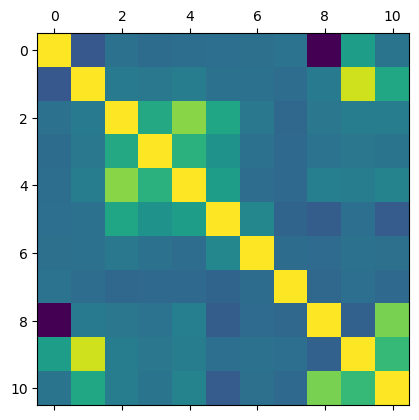

<Figure size 640x480 with 0 Axes>

In [287]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_data.corr())
plt.show()
plt.savefig("correaltion_airbnb_fin.png") #saving the figure

In [288]:
#current dir
cwd = os.getcwd()
cwd

'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/03 Scripts'

## 2 
Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [289]:
#create subset

df_sub=df_data[['Price_list','accommodates','N_bedrooms','bathrooms','Availability_365','Rating','D.Train','D.Rijskmuseuem','D.airport']]
                        
                        
                        

In [290]:
df_sub=df_sub[df_sub['Price_list'] < 5000]

Text(0.5, 1.0, 'Correlation Matrix')

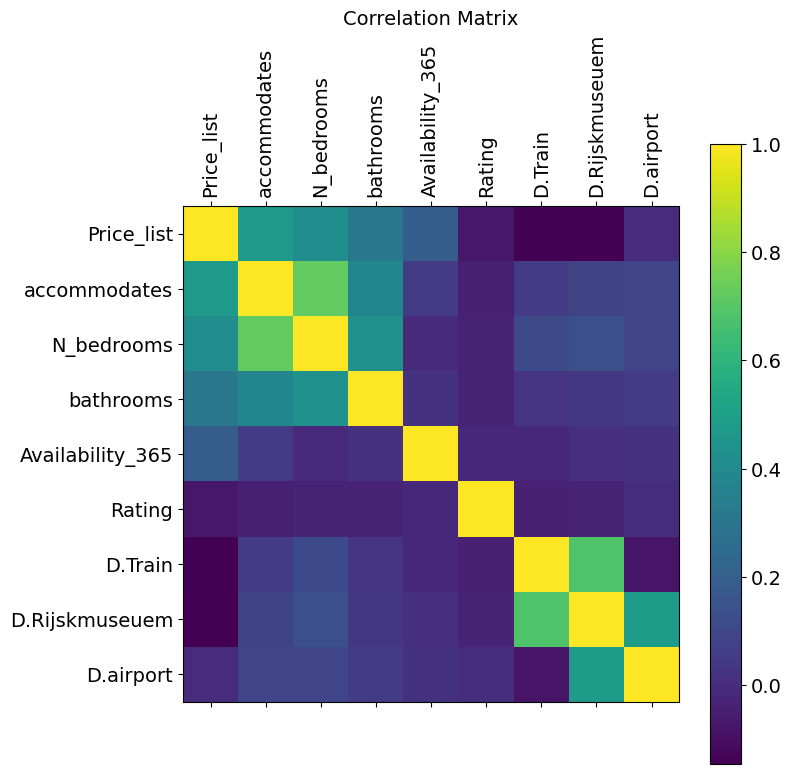

In [291]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## 3
Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

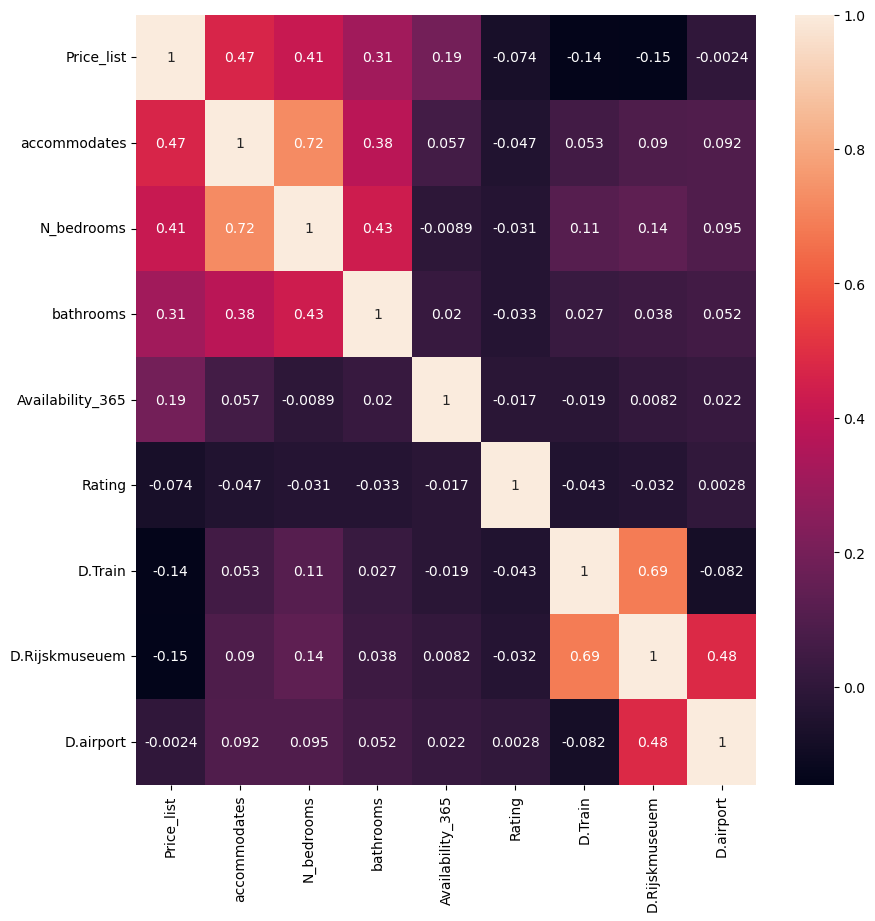

In [292]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_viz = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.


## understading gathered
1. The straongest correlation with price is Number of people the property can accomodate. distance to station or airport does not seems to be very important. As this is just checking linear correlation , we might be able to see how they imteract using scatterplots.

## 4
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

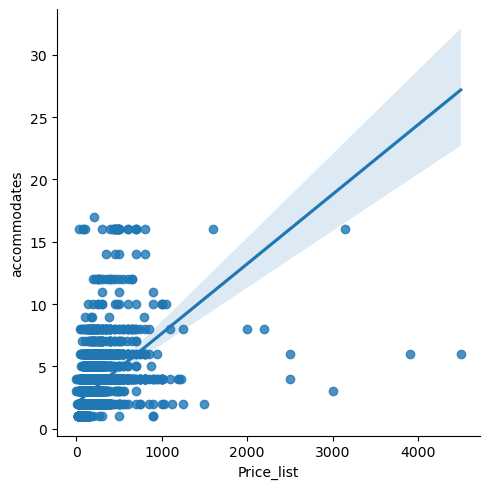

In [293]:
#creating scatter plot price and Number of people

Price_bed_scat=sns.lmplot(x = 'Price_list', y = 'accommodates', data = df_sub)

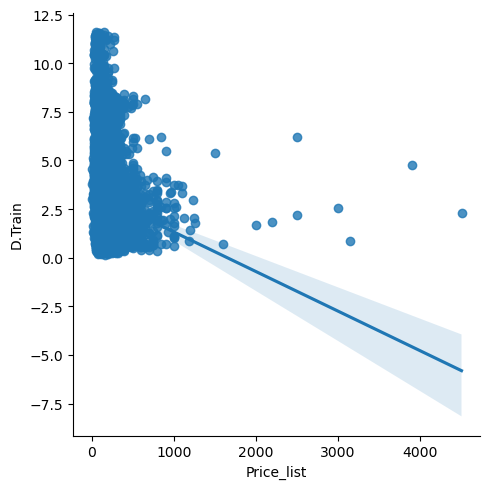

In [294]:
#creating scatter plot Number of people and bedrooms

cal_list_price_scat=sns.lmplot(x = 'Price_list', y = 'D.Train', data = df_sub)

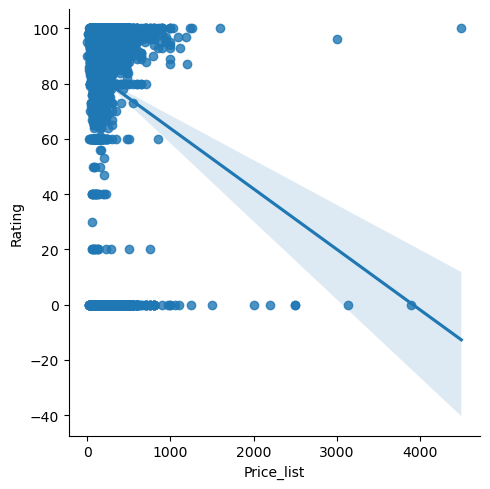

In [295]:
#creating scatter plot Price to bathrooms

Price_bad_scat=sns.lmplot(x = 'Price_list', y = 'Rating', data = df_sub)

## 5
Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

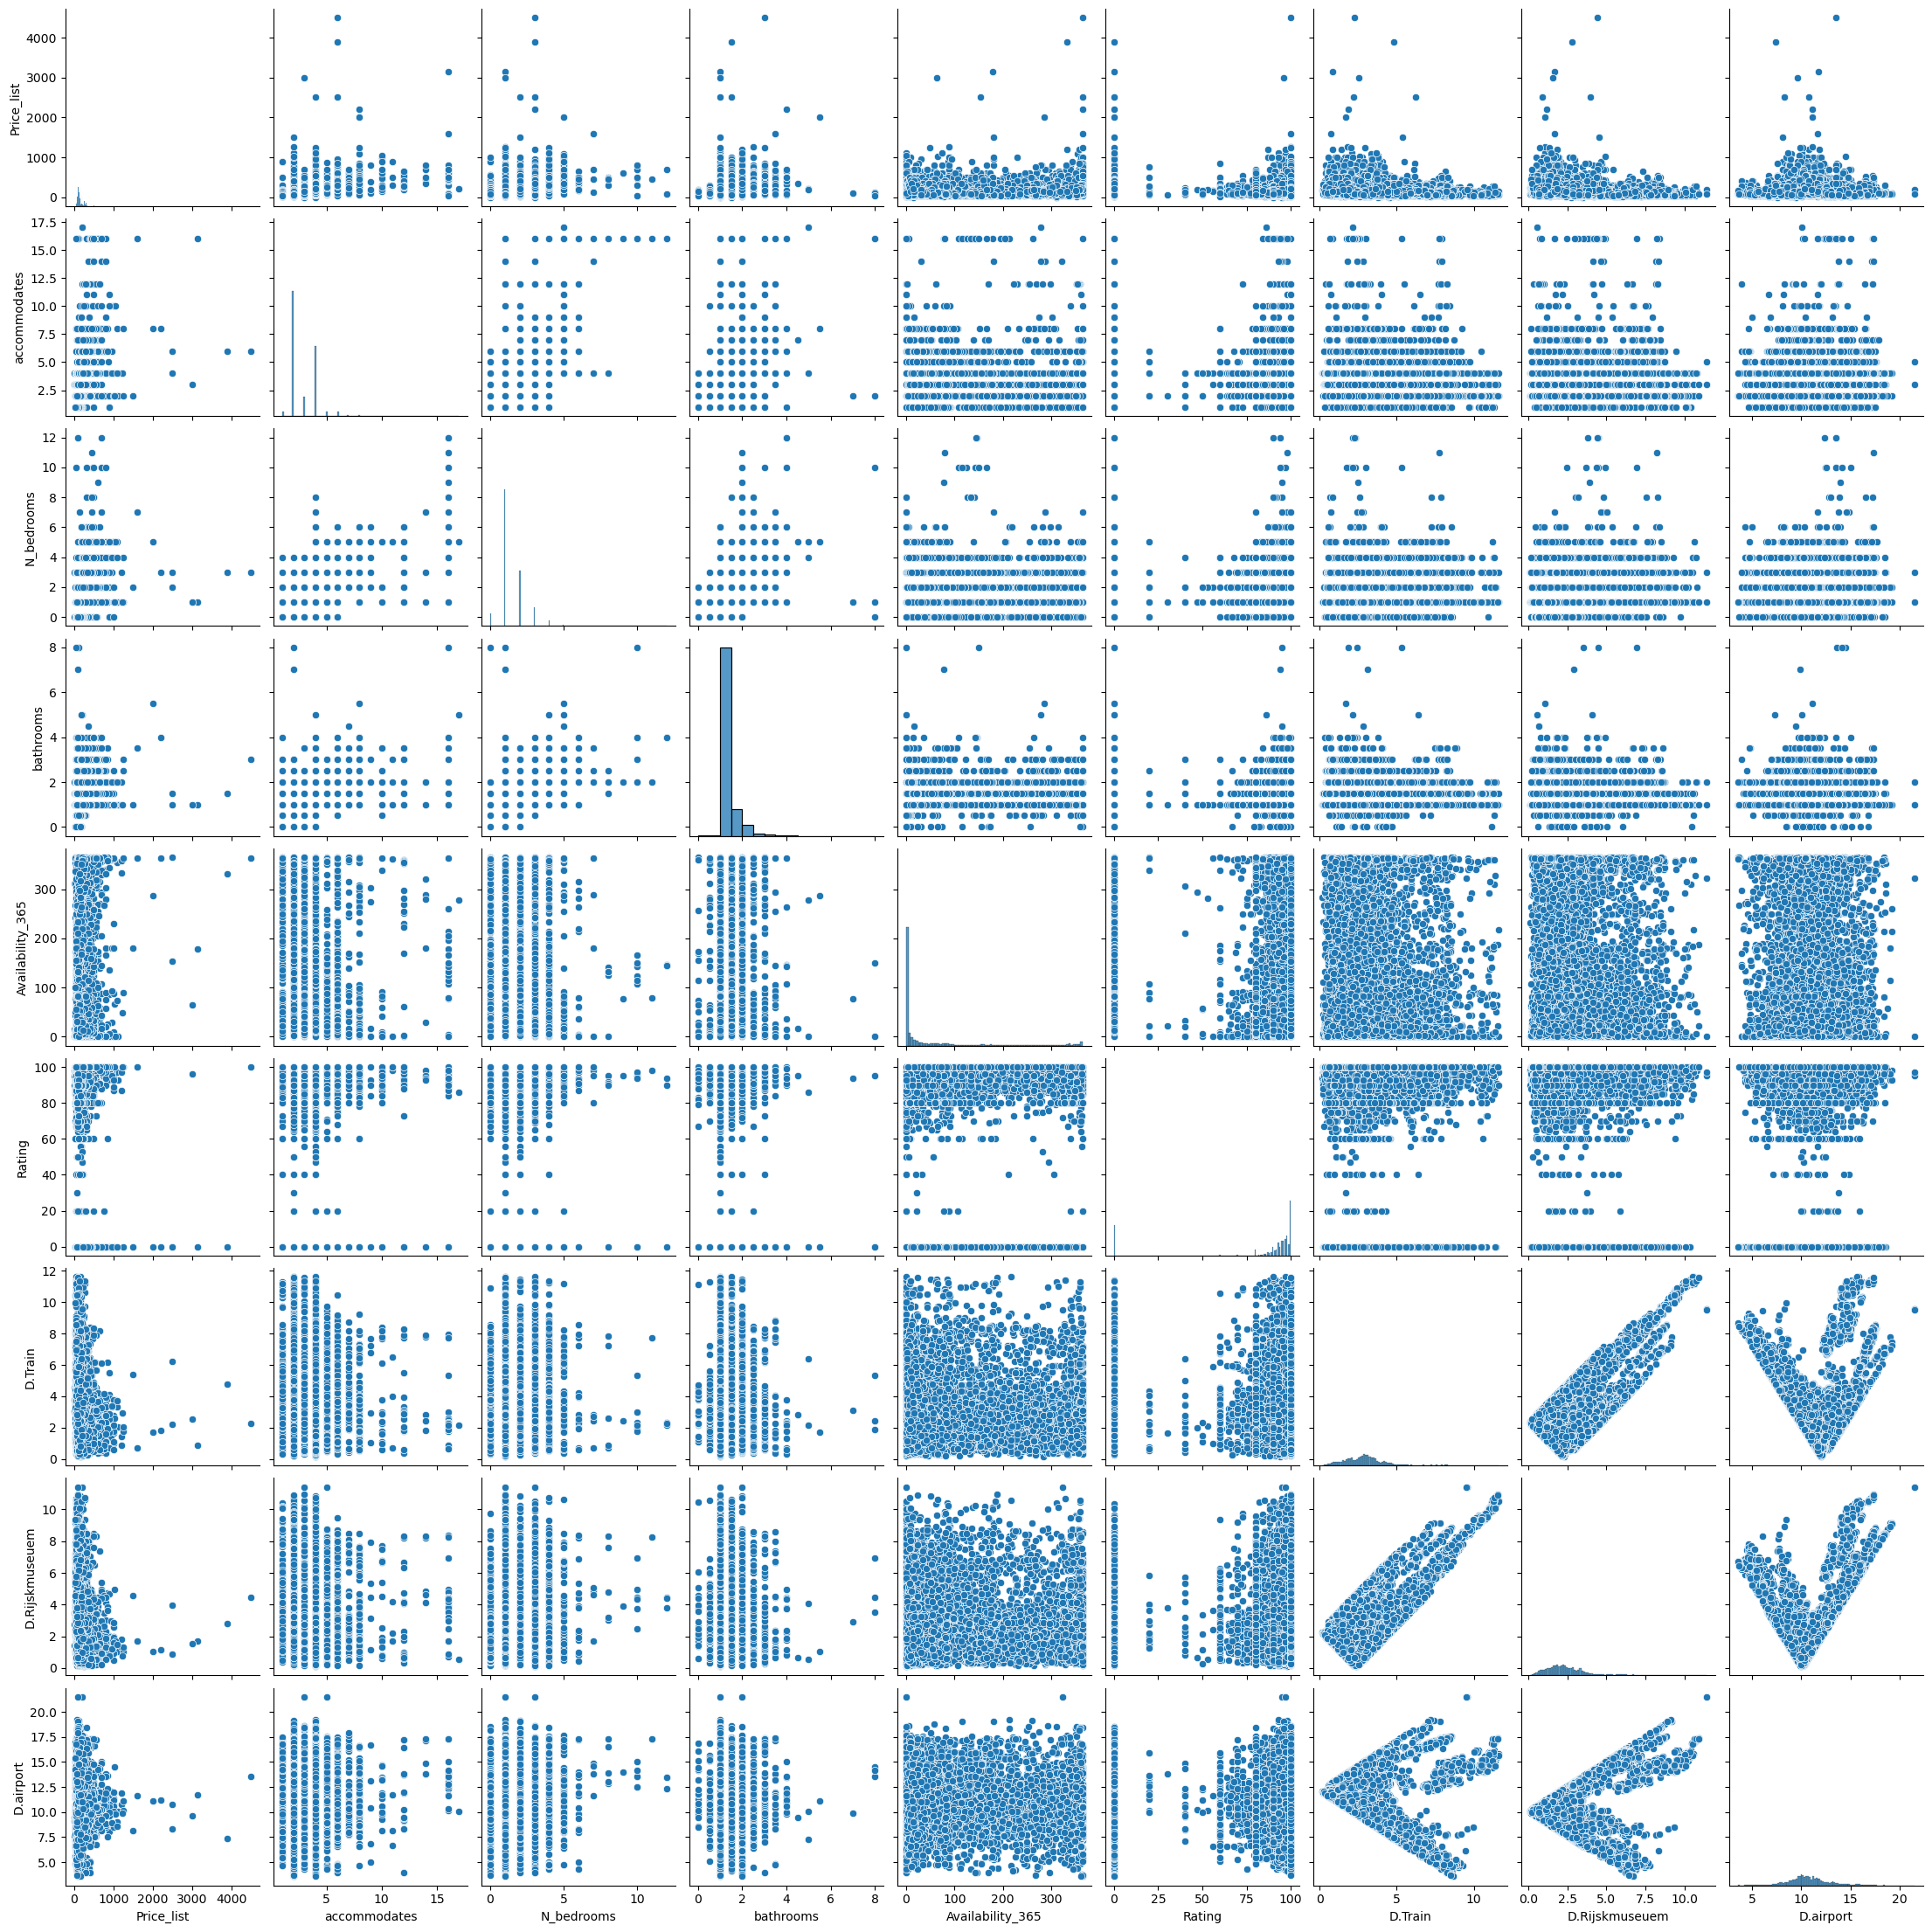

In [296]:
# Create a pair plot 

pair_plot_df_sub = sns.pairplot(df_sub)

## 6
Create a categorical plot and interpret the results.

In [297]:
df_data['Room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

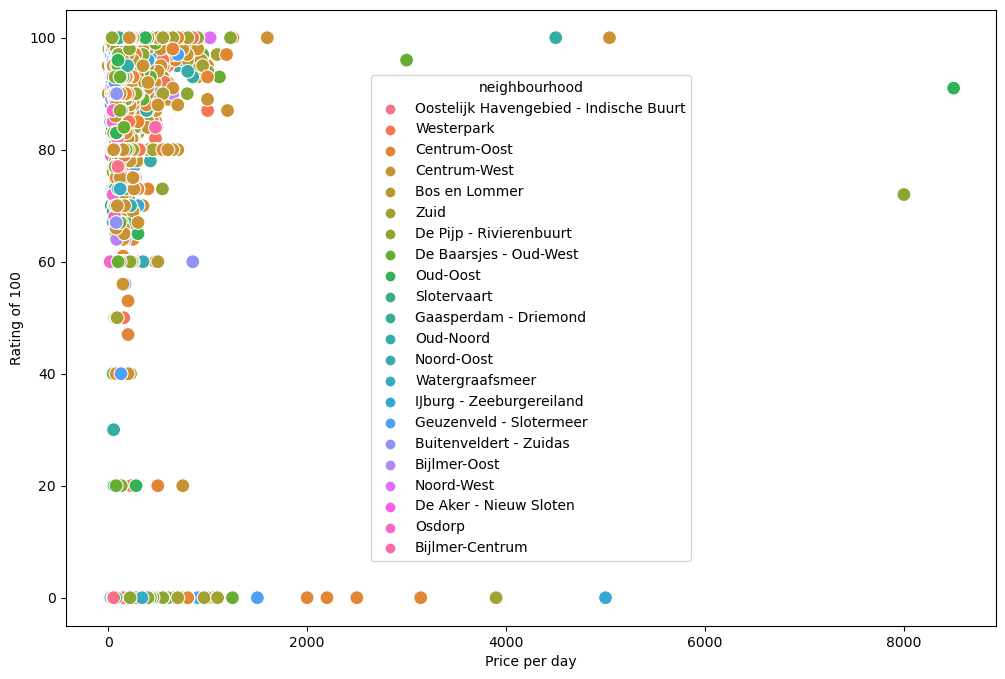

In [298]:
# Plot the clusters for the "price" and "rating" across different neighbourhoods variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_data['Price_list'], y=df_data['Rating'], hue=df_data['neighbourhood'], s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Rating of 100') 
plt.show()

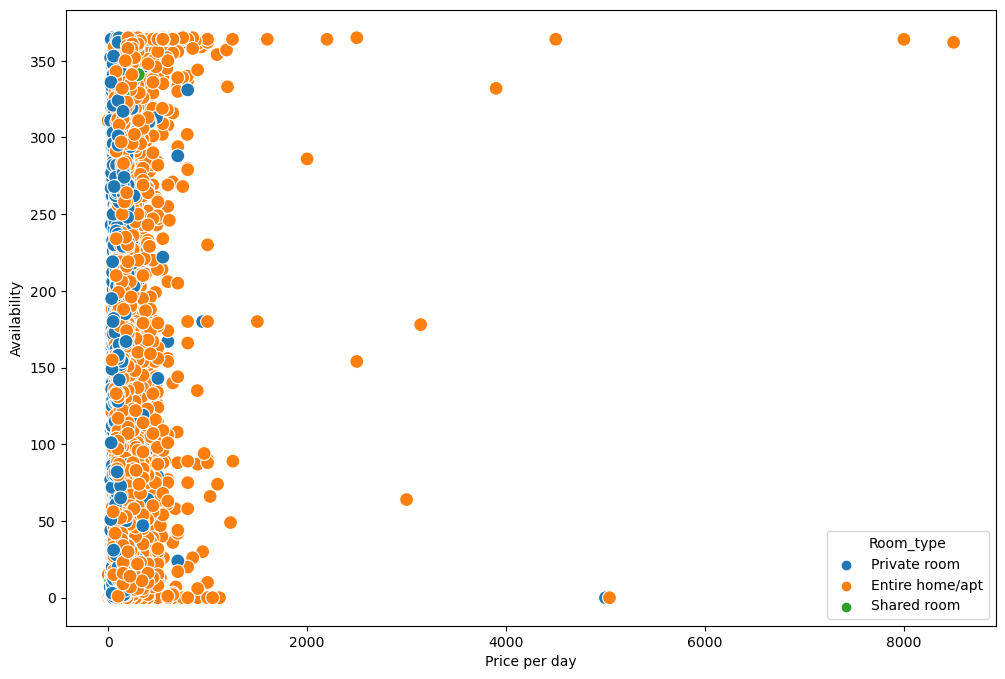

In [299]:
# Plot the clusters for the "price" and "avaialability throughtout year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_data['Price_list'], y=df_data['Availability_365'], hue=df_data['Room_type'], s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Availability') 
plt.show()

In [300]:
## Exporting the final data 
df_data.to_csv(os.path.join(path,'Prepared Data','listing_final.csv'),index=False)

## End of task 6.2 and begining of 6.3

In [301]:
#importing geojson file

country_geo=r'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data/neighbourhoods.geojson'

In [302]:
df_data.head()

Listing_id Host_id                           neighbourhood   latitude  \
0       2818    3159  Oostelijk Havengebied - Indische Buurt  52.365755   
1       3209    3806                              Westerpark  52.390225   
2      20168   59484                            Centrum-Oost  52.365087   
3      25428   56142                            Centrum-West  52.373114   
4      27886   97647                            Centrum-West  52.386727   

   longitude Property_type        Room_type  accommodates  bathrooms  \
0   4.941419     Apartment     Private room             2        1.5   
1   4.873924     Apartment  Entire home/apt             5        1.0   
2   4.893541     Townhouse  Entire home/apt             2        1.0   
3   4.883668     Apartment  Entire home/apt             3        1.0   
4   4.892078     Houseboat     Private room             2        1.0   

   N_bedrooms  Price_list  Availability_365  Rating  \
0         1.0        59.0                44    97.0   
1         2.0       160.0                47    96.0   
2         1.0        80.0               198    87.0   
3         1.0       125.0               141   100.0   
4         1.0       150.0               199    99.0   

                                  location   D.Train  D.airport  \
0  (52.365754513876176, 4.941419235184398)  3.226842  13.681696   
1   (52.39022505041117, 4.873924094742859)  2.127021  11.812562   
2  (52.36508702680917, 4.8935410078410095)  1.619653  10.864431   
3   (52.37311440038617, 4.883668196205626)  1.268552  10.896930   
4   (52.38672731612469, 4.892078070089338)  0.976877  12.353593   

   D.Rijskmuseuem  
0        3.877632  
1        3.450908  
2        0.798210  
3        1.463299  
4        3.009799

In [303]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data/neighbourhoods.geojson",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data["features"]:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[4.991669, 52.324436, 43.069286], [4.991756, 52.324289, 43.069544], [4.991828, 52.324175, 43.069746], [4.991894, 52.324077, 43.069917], [4.991952, 52.323996, 43.070058], [4.992036, 52.32387, 43.07028], [4.992109, 52.323767, 43.070461], [4.99217, 52.323706, 43.070568], [4.992597, 52.323135, 43.071567], [4.993457, 52.32195, 43.073645], [4.994212, 52.321029, 43.075261], [4.99435, 52.320829, 43.075611], [4.994392, 52.320774, 43.075707], [4.994407, 52.32076, 43.075732], [4.994621, 52.320511, 43.076169], [4.994822, 52.320267, 43.076596], [4.994834, 52.320241, 43.076642], [4.994884, 52.320184, 43.076741], [4.995243, 52.319674, 43.077635], [4.99541, 52.319446, 43.078034], [4.995604, 52.31921, 43.078448], [4.995819, 52.318968, 43.078872], [4.996035, 52.318706, 43.079331], [4.99612, 52.318579, 43.079554], [4.996189, 52.318501, 43.079691], [4.996431, 52.318201, 43.080215], [4.996455, 52.318169, 43.080272], [4.996719, 52.31

<AxesSubplot:xlabel='Rating', ylabel='Count'>

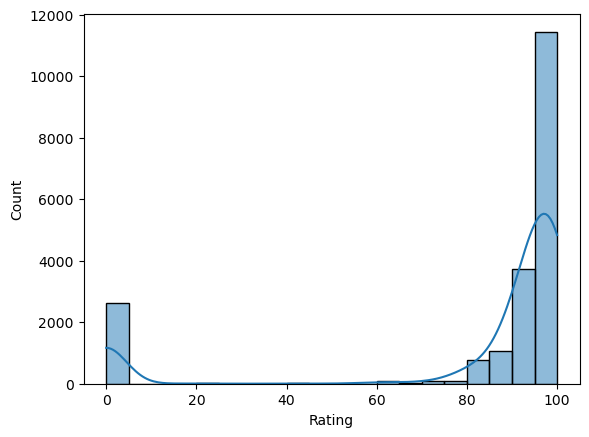

In [304]:
# Check the rating variable

sns.histplot(df_data['Rating'], bins=20, kde = True)

In [305]:
df_data['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Westerpark',
       'Centrum-Oost', 'Centrum-West', 'Bos en Lommer', 'Zuid',
       'De Pijp - Rivierenbuurt', 'De Baarsjes - Oud-West', 'Oud-Oost',
       'Slotervaart', 'Gaasperdam - Driemond', 'Oud-Noord', 'Noord-Oost',
       'Watergraafsmeer', 'IJburg - Zeeburgereiland',
       'Geuzenveld - Slotermeer', 'Buitenveldert - Zuidas',
       'Bijlmer-Oost', 'Noord-West', 'De Aker - Nieuw Sloten', 'Osdorp',
       'Bijlmer-Centrum'], dtype=object)

<AxesSubplot:xlabel='Price_list', ylabel='Count'>

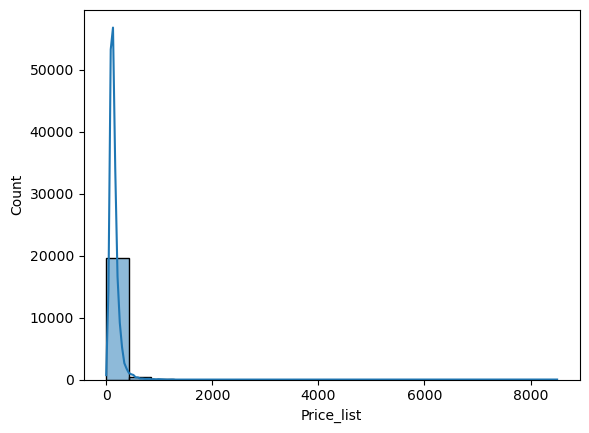

In [306]:
# Check the nieghbourhood variable

sns.histplot(df_data['Price_list'], bins=20, kde = True)

In [307]:
# Setup a folium map at a high-level zoom
map_price = folium.Map(location = [52.377956, 4.897070], zoom_start =12)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
c=folium.Choropleth(
    geo_data = country_geo, 
    data = df_data,
    columns = ["neighbourhood", "Price_list"],
    key_on = "feature.properties.neighbourhood", # this part is very important - check your json file to see where the KEY is located
    fill_color = "RdPu", fill_opacity=0.8, line_opacity=0.3,nan_fill_color="White",labels=['neighbourhood'],
    legend_name = "Price").add_to(map_price),  
    
folium.LayerControl().add_to(map_price)


map_price

In [308]:
# Setup a folium map at a high-level zoom
map_rating = folium.Map(location = [52.377956, 4.897070], zoom_start =12)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_data,
    columns = ["neighbourhood", "Rating"],
    key_on = "feature.properties.neighbourhood", # this part is very important - check your json file to see where the KEY is located
    fill_color = "RdPu", fill_opacity=0.8, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Rating").add_to(map_rating)
folium.LayerControl().add_to(map_rating)

map_rating

## End of 6.3 and Begining of 6.4

## From previous task, we understood below relationships between the variables
 For the regression analysis, I am considering price and number of people.

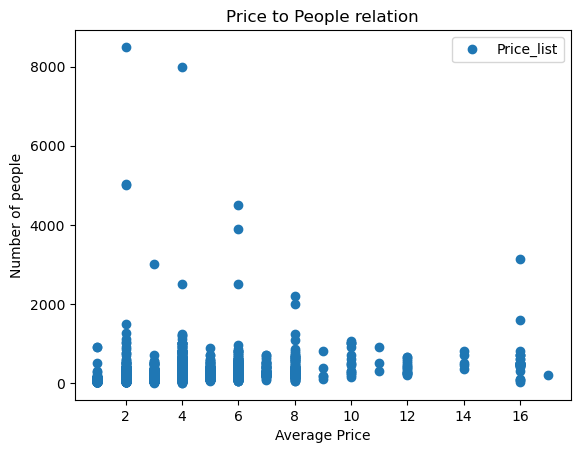

In [309]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_data.plot(x = 'accommodates', y='Price_list',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price to People relation')  
plt.xlabel('Average Price')  
plt.ylabel('Number of people')  
plt.show()

In [310]:
df_sub=df_data[df_data['Price_list'] < 50000.0]

In [311]:
df_sub.shape

(20027, 17)

In [312]:
df_sub.corr()

latitude  longitude  accommodates  bathrooms  N_bedrooms  \
latitude          1.000000  -0.138051      0.015698  -0.013375   -0.000561   
longitude        -0.138051   1.000000      0.086339   0.061190    0.093678   
accommodates      0.015698   0.086339      1.000000   0.379307    0.722642   
bathrooms        -0.013375   0.061190      0.379307   1.000000    0.432424   
N_bedrooms       -0.000561   0.093678      0.722642   0.432424    1.000000   
Price_list        0.006171   0.017743      0.356593   0.236469    0.309229   
Availability_365  0.011266   0.016079      0.056988   0.019775   -0.009013   
Rating            0.027543  -0.007711     -0.046528  -0.032994   -0.031125   
D.Train          -0.568105   0.081253      0.052876   0.027223    0.111595   
D.airport         0.308258   0.885076      0.091672   0.051489    0.094596   
D.Rijskmuseuem    0.034952   0.370361      0.090281   0.038016    0.135792   

                  Price_list  Availability_365    Rating   D.Train  D.airport  \
latitude            0.006171          0.011266  0.027543 -0.568105   0.308258   
longitude           0.017743          0.016079 -0.007711  0.081253   0.885076   
accommodates        0.356593          0.056988 -0.046528  0.052876   0.091672   
bathrooms           0.236469          0.019775 -0.032994  0.027223   0.051489   
N_bedrooms          0.309229         -0.009013 -0.031125  0.111595   0.094596   
Price_list          1.000000          0.159283 -0.059999 -0.105360   0.003716   
Availability_365    0.159283          1.000000 -0.016552 -0.019512   0.022375   
Rating             -0.059999         -0.016552  1.000000 -0.043546   0.002458   
D.Train            -0.105360         -0.019512 -0.043546  1.000000  -0.081130   
D.airport           0.003716          0.022375  0.002458 -0.081130   1.000000   
D.Rijskmuseuem     -0.110033          0.007820 -0.032136  0.686218   0.481773   

                  D.Rijskmuseuem  
latitude                0.034952  
longitude               0.370361  
accommodates            0.090281  
bathrooms               0.038016  
N_bedrooms              0.135792  
Price_list             -0.110033  
Availability_365        0.007820  
Rating                 -0.032136  
D.Train                 0.686218  
D.airport               0.481773  
D.Rijskmuseuem          1.000000

In [313]:
#reshaoing using Numpyarray for regression analysis

X=df_sub['accommodates'].values.reshape(-1,1)
y=df_sub['Price_list'].values.reshape(-1,1)

In [314]:
X

array([[2],
       [5],
       [2],
       ...,
       [2],
       [2],
       [4]])

In [315]:
y

array([[ 59.],
       [160.],
       [ 80.],
       ...,
       [ 80.],
       [ 55.],
       [220.]])

In [316]:
#splitting data for test and train

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=0)

## Regression Analysis

In [317]:
#create an object for linear regression

regression=LinearRegression()

In [318]:
#fit the regression object on train data set

regression.fit(X_train, y_train)

LinearRegression()

In [319]:
#predict y values using X
y_predicted= regression.predict(X_test)

In [320]:
y_predicted

array([[117.05860315],
       [ 78.04954626],
       [117.05860315],
       ...,
       [195.07671694],
       [117.05860315],
       [117.05860315]])

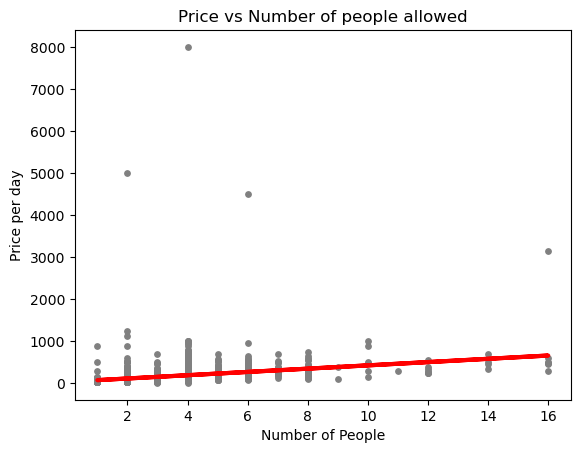

In [321]:
#plot predicted values in scatterpolt

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of people allowed')
plot_test.xlabel('Number of People')
plot_test.ylabel('Price per day')
plot_test.show()

In [322]:
#create objects that contain summary of predicted values

rmse = mean_squared_error(y_test,y_predicted)
r2=r2_score(y_test , y_predicted)

In [323]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.00905689]]
Mean squared error:  24705.021983118753
R2 score:  0.10636688654124005


In [324]:
# Create a dataframe comparing the actual and predicted values of y.

data=pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

Actual   Predicted
0   130.0  117.058603
1    50.0   78.049546
2   130.0  117.058603
3    75.0  117.058603
4   500.0  312.103888

In [325]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [326]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [327]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.00905689]]
Mean squared error:  15931.294954283236
R2 score:  0.14040998424604678


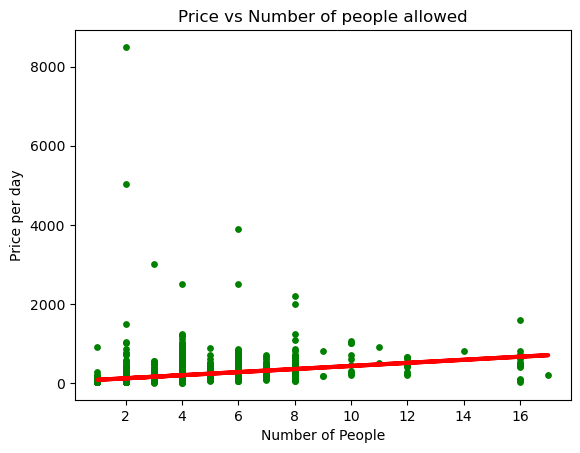

In [328]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Number of people allowed')
plot_test.xlabel('Number of People')
plot_test.ylabel('Price per day')
plot_test.show()

From the R2(too low) and mean squared error(too high), we can understand that there is no linear relation between Number of people that can stay in the Airbnb to price. This model is not suitable for the data set we have here.

## Running k-means on Airbnb Amsterdam data

In [329]:
# Importing libraries for k-means
from sklearn.cluster import KMeans
import pylab as pl
#importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [330]:
#create subset

df_clust=df_data[['Price_list','accommodates','N_bedrooms','bathrooms','Availability_365','Rating','D.Train','D.Rijskmuseuem','D.airport']]
                        
                        
                        

In [331]:
df_clust.shape

(20027, 9)

In [332]:
scaler=StandardScaler()
segmentation_std=scaler.fit_transform(df_clust)


In [333]:
pca=PCA()
pca.fit(segmentation_std)

PCA()

In [334]:
pca.explained_variance_ratio_

array([0.25897758, 0.20022287, 0.12189571, 0.11647905, 0.10785035,
       0.0788067 , 0.07242914, 0.02983003, 0.01350857])

Text(0, 0.5, 'Cummulative explained variance')

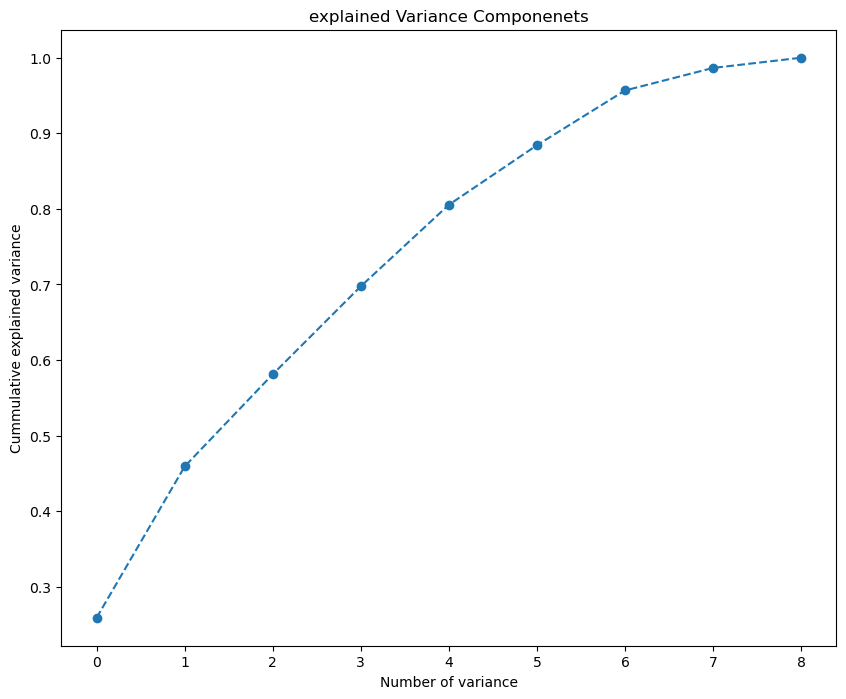

In [335]:
plt.figure(figsize=(10,8))
plt.plot(range(0,9),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('explained Variance Componenets')
plt.xlabel('Number of variance')
plt.ylabel('Cummulative explained variance')

4 componenets would cover 80% of data.

In [336]:
# From previous graph, we can see we can use 3 or 4 components. We use 3 components as it covers 90%
pca=PCA(n_components=4)

In [337]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [338]:
pca.transform(segmentation_std)

array([[-0.05802638, -1.18939386,  0.88318612, -0.83544325],
       [ 1.15068975,  0.06913165,  0.4835402 , -0.72307128],
       [-1.26668609,  0.98573814,  0.9750147 ,  0.56883422],
       ...,
       [-0.5645554 , -0.49113139,  1.19032644,  2.10899437],
       [-0.63549192, -0.95294862,  0.48831394,  0.9112289 ],
       [ 0.86161106,  0.3880793 , -0.86097356,  1.26344696]])

In [339]:
scores_pca=pca.transform(segmentation_std)

In [340]:
#fitting PCA to k-means

wcss=[]
for i in range(1,10):
    kmeans_pca=KMeans(n_clusters = i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

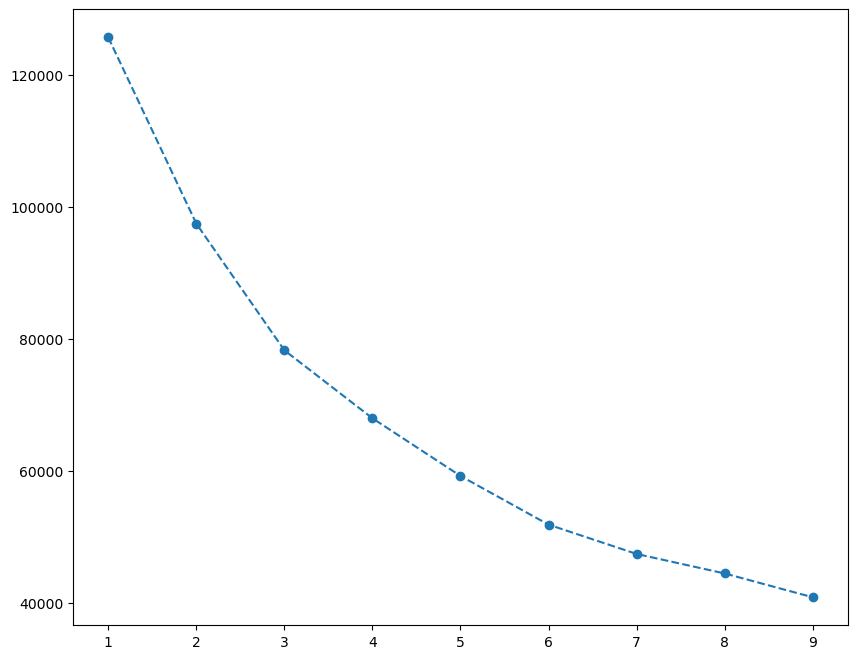

In [341]:
plt.figure(figsize=(10,8))
plt.plot(range(1,10),wcss,marker='o',linestyle = '--')
plt.xlabel=('Number of Clusters')
plt.ylabel=('WCSS')
plt.titke=('K-means with PCA clustering')
plt.show()

In [342]:
# from the gRaph above, we can understand the elbow bents between 4-5 . For this scenario, we will go with 4.

kmeans_pca=KMeans(n_clusters=4 , init ='k-means++', random_state=42)

In [343]:
# fitting data with k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [344]:
scores_pca.shape

(20027, 4)

In [345]:
df_seg_pca_kmean=pd.concat([df_clust.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_seg_pca_kmean.columns.values[-3:]=['Component 1','Component 2','Component 3']
df_seg_pca_kmean['Segment K-means PCA']=kmeans_pca.labels_

In [346]:
df_data['Clusters']=kmeans_pca.labels_

In [347]:
df_seg_pca_kmean

Price_list  accommodates  N_bedrooms  bathrooms  Availability_365  \
0            59.0             2         1.0        1.5                44   
1           160.0             5         2.0        1.0                47   
2            80.0             2         1.0        1.0               198   
3           125.0             3         1.0        1.0               141   
4           150.0             2         1.0        1.0               199   
...           ...           ...         ...        ...               ...   
20022       340.0             4         3.0        2.0                11   
20023       150.0             3         2.0        1.0                16   
20024        80.0             2         1.0        1.0               210   
20025        55.0             2         1.0        1.0                31   
20026       220.0             4         2.0        1.0                14   

       Rating   D.Train  D.Rijskmuseuem  D.airport         0  Component 1  \
0        97.0  3.226842        3.877632  13.681696 -0.058026    -1.189394   
1        96.0  2.127021        3.450908  11.812562  1.150690     0.069132   
2        87.0  1.619653        0.798210  10.864431 -1.266686     0.985738   
3       100.0  1.268552        1.463299  10.896930 -0.755806     0.996401   
4        99.0  0.976877        3.009799  12.353593 -0.780299     0.244539   
...       ...       ...             ...        ...       ...          ...   
20022     0.0  5.151172        4.815111  13.493210  3.734043    -1.082918   
20023     0.0  2.923666        3.225866  12.968768  0.614695    -0.573373   
20024     0.0  2.642085        2.849100  12.636025 -0.564555    -0.491131   
20025     0.0  2.830233        3.243776  13.041871 -0.635492    -0.952949   
20026     0.0  3.595758        1.846429  10.339589  0.861611     0.388079   

       Component 2  Component 3  Segment K-means PCA  
0         0.883186    -0.835443                    1  
1         0.483540    -0.723071                    2  
2         0.975015     0.568834                    3  
3         0.914703    -0.040634                    1  
4         1.907088     0.234806                    3  
...            ...          ...                  ...  
20022    -0.345570     0.853430                    2  
20023     0.274658     0.784908                    3  
20024     1.190326     2.108994                    3  
20025     0.488314     0.911229                    3  
20026    -0.860974     1.263447                    3  

[20027 rows x 14 columns]

In [348]:
df_seg_pca_kmean['Segment K-means PCA'].value_counts()

1    11249
3     4179
2     2944
0     1655
Name: Segment K-means PCA, dtype: int64

In [349]:
# restarting matplotlib

import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

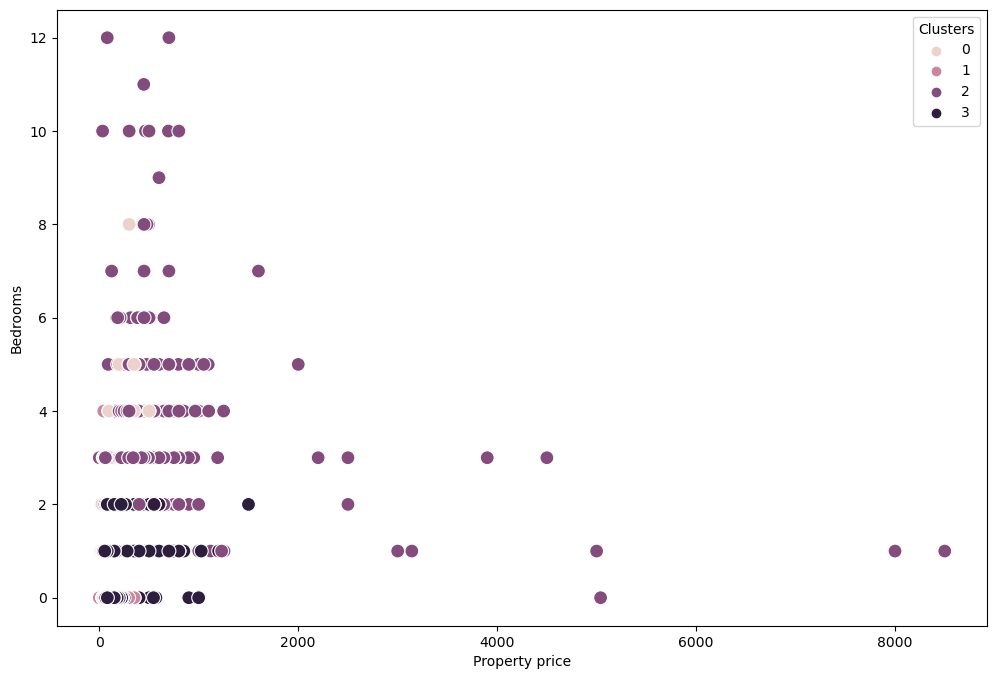

In [350]:
# Plot the clusters for the "Price" and "Bedrooms" variables.

plt.figure(figsize=(12,8))
pricebed = sns.scatterplot(x=df_data['Price_list'], y=df_data['N_bedrooms'], hue=df_data['Clusters'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
pricebed.grid(False) # This removes the grid from the background.
plt.xlabel('Property price') # Label x-axis.
plt.ylabel('Bedrooms') # Label y-axis.
plt.show()

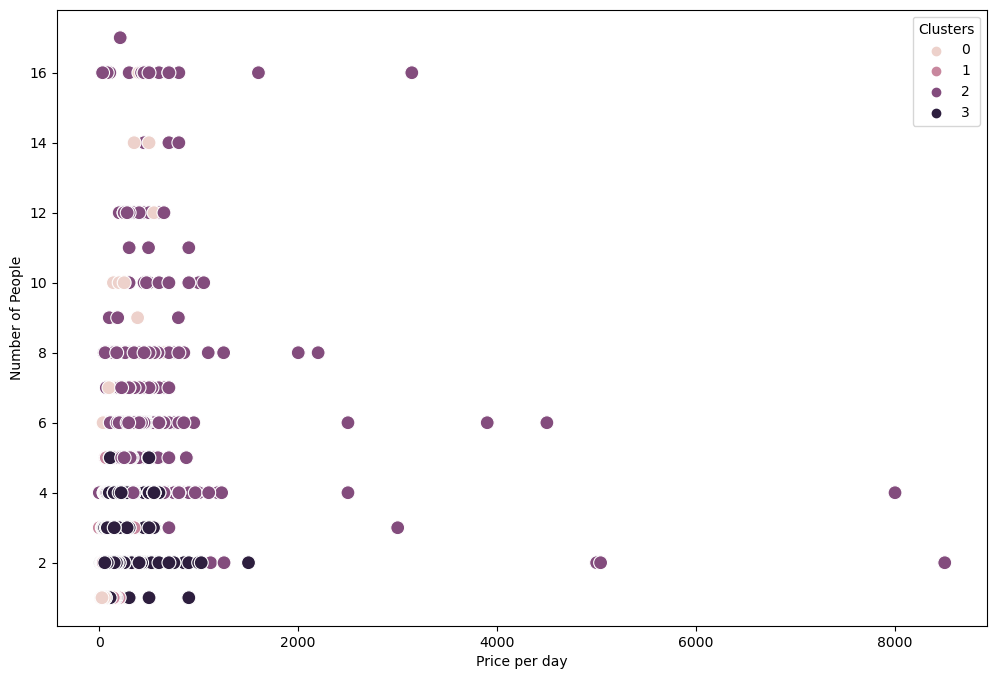

In [351]:
# Plot the clusters for the "Price" and "PNumber of people" variables.

plt.figure(figsize=(12,8))
ae = sns.scatterplot(x=df_data['Price_list'], y=df_data['accommodates'], hue=df_data['Clusters'], s=100)

ae.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Number of People') 
plt.show()

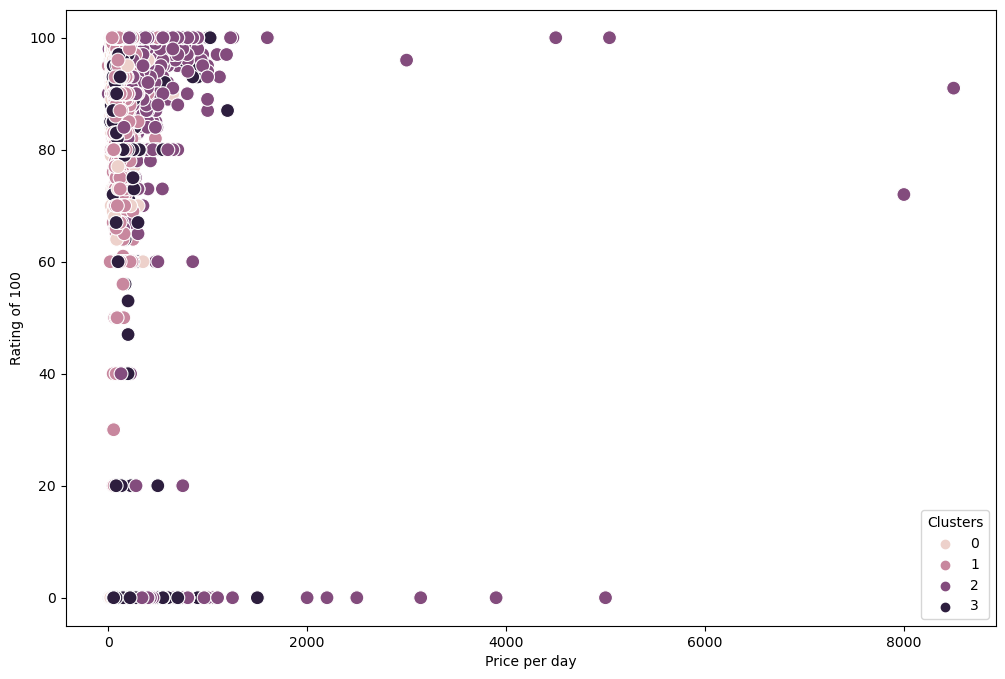

In [352]:
# Plot the clusters for the "Price" and "Rating" variables.

plt.figure(figsize=(12,8))
af = sns.scatterplot(x=df_data['Price_list'], y=df_data['Rating'], hue=df_data['Clusters'], s=100)

af.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Rating of 100') 
plt.show()

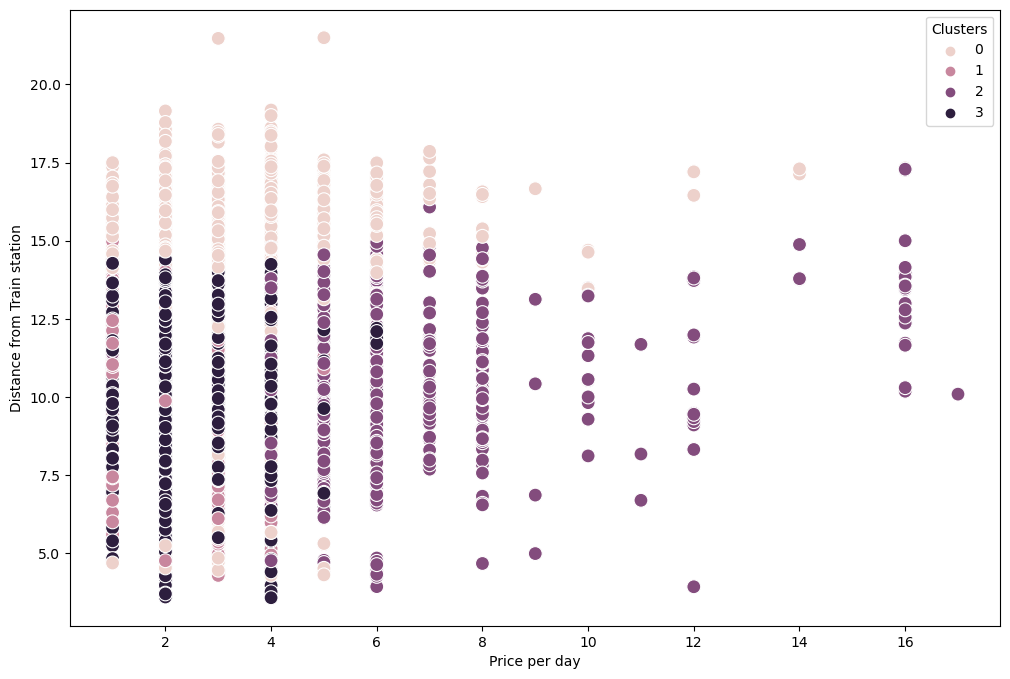

In [353]:
# Plot the clusters for the "No. of people" and "Distance from airport" variables.

plt.figure(figsize=(12,8))
ag = sns.scatterplot(x=df_data['accommodates'], y=df_data['D.airport'], hue=df_data['Clusters'], s=100)

ag.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Distance from Train station') 
plt.show()

Text(0.5, 0, 'accommodates')

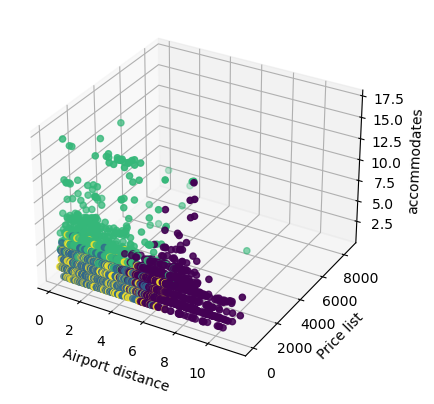

In [359]:
fig = plt.figure()
ah = fig.add_subplot(111, projection='3d')
x = np.array(df_data['D.Rijskmuseuem'])
y = np.array(df_data['Price_list'])
z = np.array(df_data['accommodates'])
ah.scatter(x,y,z, c=[kmeans_pca.labels_], s=20)
ah.set_xlabel("Distance from Center")
ah.set_ylabel("Price list") 
ah.set_zlabel("accommodates")

In [356]:
df_data.loc[df_data['Clusters'] == 2, 'Cluster'] = 'pink'
df_data.loc[df_data['Clusters'] == 1, 'Cluster'] = 'light pink'
df_data.loc[df_data['Clusters'] == 0, 'Cluster'] = 'beige'
df_data.loc[df_data['Clusters'] == 3, 'Cluster'] = 'purple'

In [361]:
df_data.groupby('Clusters').agg({'Price_list':['mean', 'median'], 
                         'D.airport':['mean', 'median'],
                          'accommodates':['mean','median'],
                           'Rating':['mean','median'],
                           'D.Rijskmuseuem':['mean','median']})

Price_list         D.airport            accommodates         \
                mean median       mean     median         mean median   
Clusters                                                                
0         123.794562  110.0  14.667179  15.264379     3.361329    4.0   
1         123.914392  119.0  10.503426  10.430194     2.480398    2.0   
2         275.592731  225.0  10.600096  10.562675     4.639266    4.0   
3         152.594161  130.0  10.354462  10.451291     2.581957    2.0   

             Rating        D.Rijskmuseuem            
               mean median           mean    median  
Clusters                                             
0         79.659819   95.0       6.643451  6.399284  
1         94.968886   97.0       2.230317  2.177427  
2         81.537024   96.0       2.251536  2.044263  
3         50.025126   84.0       2.243154  2.110113

In [362]:
# Exporting this for final presentation
df_data.to_csv(os.path.join(path,'Prepared Data','Airbnb_clusters.csv'),index=False)